In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from imutils import paths

In [19]:
from keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


print("loaded")

loaded


In [48]:
# Load data images
imagePaths = list(paths.list_images("Resources//data3"))
imagePaths = [imagePath.replace("\\","//",-1) for imagePath in imagePaths]
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    # Extract the class label from directory
    label = imagePath.split("//")[2]
    labels.append(label)
    
    # Convert image to grey scale and 48x48
    image = load_img(imagePath, color_mode = "grayscale")
    image = img_to_array(image)
    image /= 255
    
    data.append(image)

# Convert the data and labels to np arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)    

# Perform one-hot encoding on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

# Init variables
INIT_LR = 1e-4
EPOCHS = 50
BS = 64

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

#model.summary()
print("Data and Model Loaded")

Data and Model Loaded


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

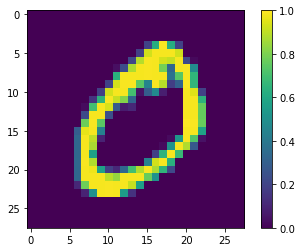

In [42]:
#print(trainX[0])
#print(train_images.shape)

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
print(train_images[0])


plt.figure()
plt.imshow(train_images[1].reshape((28,28)))
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS),metrics=["accuracy"])

history = model.fit(trainX,trainY,batch_size=BS,epochs=EPOCHS,validation_data=(testX, testY))

model.save("Resources/Trained_Data/test_NumEPOCHS_" + str(EPOCHS) + ".h5")

print("trained")

Train on 5740 samples, validate on 1436 samples
Epoch 1/10
5740/5740 [==============================] - 35s 6ms/sample - loss: 1.8387 - accuracy: 0.2429 - val_loss: 1.8419 - val_accuracy: 0.2472
Epoch 2/10
5740/5740 [==============================] - 36s 6ms/sample - loss: 1.8252 - accuracy: 0.2448 - val_loss: 1.8317 - val_accuracy: 0.2465
Epoch 3/10
5740/5740 [==============================] - 35s 6ms/sample - loss: 1.7929 - accuracy: 0.2646 - val_loss: 1.7688 - val_accuracy: 0.2960
Epoch 4/10
5740/5740 [==============================] - 36s 6ms/sample - loss: 1.7070 - accuracy: 0.3239 - val_loss: 1.6850 - val_accuracy: 0.3607
Epoch 5/10
5740/5740 [==============================] - 35s 6ms/sample - loss: 1.6375 - accuracy: 0.3629 - val_loss: 1.6092 - val_accuracy: 0.3809
Epoch 6/10
5740/5740 [==============================] - 36s 6ms/sample - loss: 1.5992 - accuracy: 0.3791 - val_loss: 1.5802 - val_accuracy: 0.3837
Epoch 7/10
5740/5740 [==============================] - 37s 6ms/sample

Training Completed


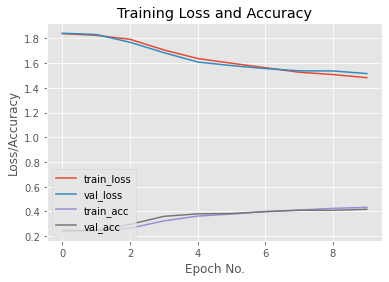

In [50]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("Resources/Training_Graph_NumEPOCHS_" + str(EPOCHS))
print("Training Completed")